## 0. Install TensorFlow 2.0

In [1]:
!pip install tensorflow-gpu==2.0.0-alpha0

    100% |████████████████████████████████| 332.1MB 32kB/s 
    100% |████████████████████████████████| 61kB 26.5MB/s 
    100% |████████████████████████████████| 3.0MB 9.2MB/s 
    100% |████████████████████████████████| 419kB 12.7MB/s 


## 1. Load image data

In [2]:
import tensorflow_datasets as tfds

batch_size = 64

dataset = tfds.load('cifar10')
dataset = dataset['train']
dataset = dataset.batch(batch_size)

W0421 06:17:54.165990 140081241241472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:325: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/1.0.2. Subsequent calls will reuse this data.


## 2. Data Augumentation

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 30, horizontal_flip = True, zoom_range = 0.2)

## 3. Display the result

(64, 32, 32, 3)


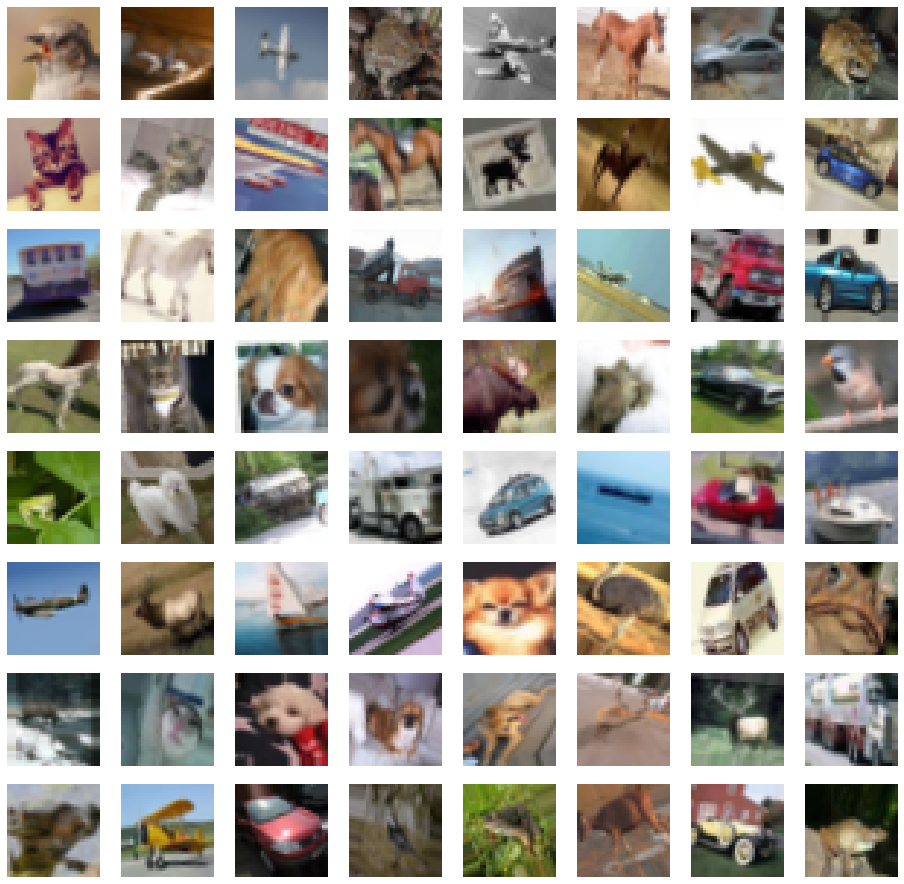

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

column_size = math.floor(math.sqrt(batch_size))
row_size = math.ceil(batch_size / column_size)
fig, ax = plt.subplots(row_size, column_size, figsize = (row_size * 2, column_size * 2), subplot_kw = {'xticks': (), 'yticks': ()})

for axis in ax:
    for a in axis:
        a.set_axis_off()

for data_list in dataset:    
    image_list = data_list['image']
    label_list = data_list['label']

    row, column = 0, 0
    for x, y in datagen.flow(image_list, label_list, batch_size = batch_size):
        print(x.shape)
        for _x in x:
            _x = tf.cast(_x, tf.uint8)
            ax[row, column].imshow(_x)
            if column == column_size - 1:
                column = 0
                row += 1
            else:
                column += 1
        break
    break